In [46]:
import requests as rq
import json
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
test=pd.DataFrame(json.loads(rq.get('https://api.openf1.org/v1/intervals?driver_number=1&session_key=9523').text))

In [42]:
test

,session_key,meeting_key,date,driver_number,gap_to_leader,interval
0,9523,1236,2024-05-26T13:03:22.423000+00:00,1,1.460,0.277
1,9523,1236,2024-05-26T13:03:25.450000+00:00,1,1.533,0.313
2,9523,1236,2024-05-26T13:03:28.891000+00:00,1,1.964,0.278
3,9523,1236,2024-05-26T13:03:32.829000+00:00,1,2.900,0.362
4,9523,1236,2024-05-26T13:03:38.247000+00:00,1,3.781,NaN
...,...,...,...,...,...,...
1628,9523,1236,2024-05-26T15:26:23.045000+00:00,1,15.356,0.827
1629,9523,1236,2024-05-26T15:26:27.533000+00:00,1,15.194,0.731
1630,9523,1236,2024-05-26T15:26:32.754000+00:00,1,15.017,0.661
1631,9523,1236,2024-05-26T15:26:37.160000+00:00,1,14.726,0.602


In [43]:
test2=pd.DataFrame(json.loads(rq.get('https://api.openf1.org/v1/intervals?driver_number=63&session_key=9523').text))

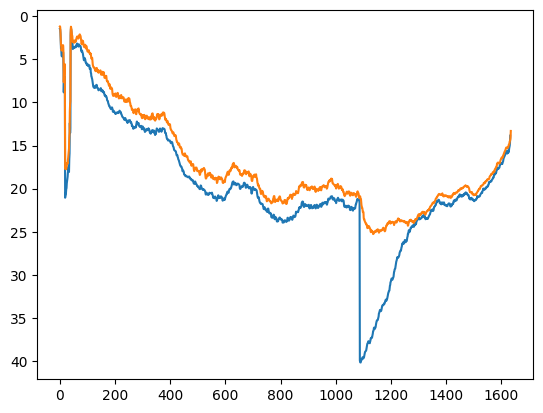

In [49]:
test['datetime']=pd.to_datetime(test['date'],format='mixed')
test2['datetime']=pd.to_datetime(test2['date'],format='mixed')
testx=pd.concat([test,test2])
testx=testx.reset_index()
fig,ax=plt.subplots()
testgroup=testx.groupby('driver_number')
for i,group in testgroup:
    ax.plot(group['index'],group['gap_to_leader'])
ax.invert_yaxis()

In [27]:
test2

,x,y,z,driver_number,date,session_key,meeting_key
0,0,0,0,55,2023-09-15T12:45:02.366000+00:00,9159,1219
1,0,0,0,55,2023-09-15T12:45:02.586000+00:00,9159,1219
2,0,0,0,55,2023-09-15T12:45:02.746000+00:00,9159,1219
3,0,0,0,55,2023-09-15T12:45:02.986000+00:00,9159,1219
4,0,0,0,55,2023-09-15T12:45:03.147000+00:00,9159,1219
...,...,...,...,...,...,...,...
19022,852,-157,189,55,2023-09-15T14:07:55.414000+00:00,9159,1219
19023,852,-157,189,55,2023-09-15T14:07:55.654000+00:00,9159,1219
19024,852,-157,189,55,2023-09-15T14:07:56.014000+00:00,9159,1219
19025,852,-157,189,55,2023-09-15T14:07:56.175000+00:00,9159,1219


In [31]:
pd.DataFrame(json.loads(rq.get('https://api.openf1.org/v1/team_radio?session_key=9523&driver_number=1').text))

,session_key,meeting_key,driver_number,date,recording_url
0,9523,1236,1,2024-05-26T13:58:55.583000+00:00,https://livetiming.formula1.com/static/2024/20...
1,9523,1236,1,2024-05-26T15:03:14.548000+00:00,https://livetiming.formula1.com/static/2024/20...
2,9523,1236,1,2024-05-26T15:28:19.559000+00:00,https://livetiming.formula1.com/static/2024/20...
3,9523,1236,1,2024-05-26T15:28:19.559000+00:00,https://livetiming.formula1.com/static/2024/20...


In [30]:
rq.get('https://api.openf1.org/v1/sessions?country_name=Monaco&session_name=Race&year=2024').text

'[{"session_key":9523,"session_name":"Race","date_start":"2024-05-26T13:00:00+00:00","date_end":"2024-05-26T15:00:00+00:00","gmt_offset":"02:00:00","session_type":"Race","meeting_key":1236,"location":"Monaco","country_key":114,"country_code":"MON","country_name":"Monaco","circuit_key":22,"circuit_short_name":"Monte Carlo","year":2024}]'